In [1]:
import pandas as pd

# 파일 불러오기 (한글 깨짐 방지를 위해 encoding='utf-8-sig' 사용)
df = pd.read_csv('한우세트_최종데이터.csv', encoding='utf-8-sig')
df

,주문날짜,별점,포장방식,상품명,후기
0,NaN,5,기본포장,백두명작,차돌박이 졸라 마싯음꾸어서\n라면이랑 먹으니까 죽는줄알았어여
1,2026-02-02,5,보자기포장,백두명작,선물 받은 분들이 너무 이쁘다고 만족해했어요
2,2026-02-03,5,고급선물포장,천하명작,배송도 빠르고 아주 만족합니다~^^
3,2026-02-04,5,기본포장,백두명작,작년 명절에도 주문해서 선물드리고 만족해서 올해도 주문했어요! 고기 질도 신선하고 ...
4,2026-02-02,5,기본포장,한라명작,맛있어요 또 구매하겠습니다
...,...,...,...,...,...
395,2025-12-05,5,고급선물포장,천하명작,재구매 하려고 합니다 \n선물용으로 구매 했는데 만족 합니다
396,2025-12-05,5,고급선물포장,천하명작,재구매 하려고 합니다 \n선물용으로 구매 했는데 만족 합니다
397,2025-12-22,5,보자기포장,천하명작,너무 신선하고 맛있어요 선물용으로
398,2025-12-22,5,고급선물포장,천하명작,늘 선물드리는데 구매하고 있습니다. 감사합니다.


In [2]:
import pandas as pd

# 1. 데이터 불러오기
df = pd.read_csv('한우세트_최종데이터.csv')

# 2. '후기' 컬럼 선택 후 상위 10개 출력
print(df['후기'].head(10))

0                    차돌박이 졸라 마싯음꾸어서\n라면이랑 먹으니까 죽는줄알았어여
1                             선물 받은 분들이 너무 이쁘다고 만족해했어요
2                                  배송도 빠르고 아주 만족합니다~^^
3    작년 명절에도 주문해서 선물드리고 만족해서 올해도 주문했어요! 고기 질도 신선하고 ...
4                                       맛있어요 또 구매하겠습니다
5                             지인 선물로 드렸는데 괜찮게 드셨다고합니다.
6                             선물용으로 구입했는데 \n너무나 좋아하시네요
7                                잘 받았습나다. 선물용으로 좋아요~~~
8                                    택배 빠르고 좋네요 잘먹습니다.
9    명절때마다 부모님께 늘 보내드리는데\n예약한 날짜에 맞춰 잘발송해주셨고\n방금 잘받...
Name: 후기, dtype: object


### 후기 빈출단어 수집하기

In [3]:
import pandas as pd
import re
from collections import Counter

# 1. 데이터 불러오기
df = pd.read_csv('한우세트_최종데이터.csv')

# 2. 후기 데이터 전처리 (결측치 제거 및 텍스트 합치기)
reviews = df['후기'].dropna().astype(str).tolist()
all_text = " ".join(reviews)

# 3. 한글만 남기고 특수문자 제거
clean_text = re.sub(r'[^가-힣\s]', ' ', all_text)

# 4. 단어 분리 및 2글자 이상 단어만 필터링
words = clean_text.split()
filtered_words = [word for word in words if len(word) >= 2]

# 5. 빈도수 계산 및 상위 20개 출력
word_counts = Counter(filtered_words)
top_20 = word_counts.most_common(20)

for word, count in top_20:
    print(f"{word}: {count}회")

너무: 52회
감사합니다: 44회
선물로: 42회
선물용으로: 31회
좋아요: 31회
맛있어요: 28회
고기: 27회
맛있게: 27회
선물: 21회
포장도: 19회
정말: 18회
아주: 17회
좋아하시네요: 17회
분이: 16회
포장이: 16회
배송: 16회
신선하고: 15회
맛있다고: 15회
하네요: 15회
먹었습니다: 15회


In [1]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### 후기 워드클라우드

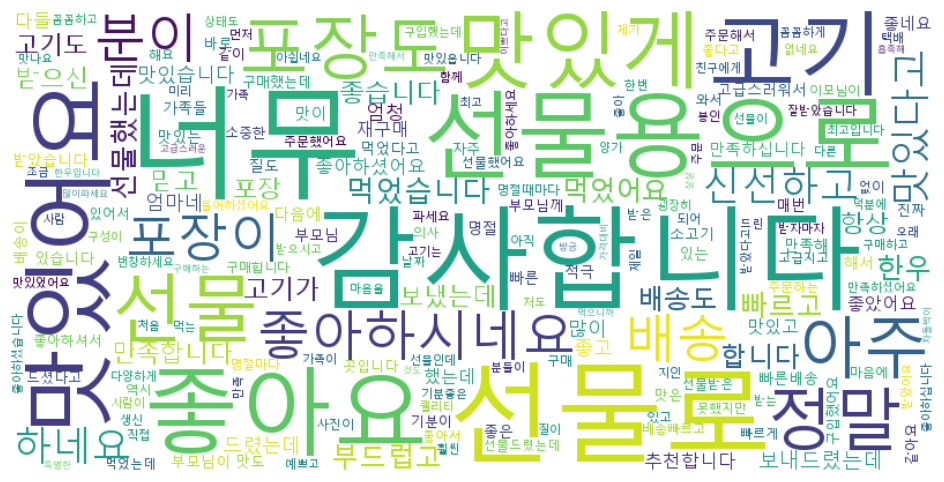

In [2]:
import pandas as pd
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. 데이터 준비 및 전처리
df = pd.read_csv('한우세트_최종데이터.csv')
reviews = df['후기'].dropna().astype(str).tolist()
all_text = " ".join(reviews)
clean_text = re.sub(r'[^가-힣\s]', ' ', all_text)
words = clean_text.split()
filtered_words = [word for word in words if len(word) >= 2]

# 2. 빈도수 계산 (이 결과값이 딕셔너리 형태입니다)
word_counts = Counter(filtered_words)

# 3. 워드 클라우드 생성
wc = WordCloud(
    font_path='malgun',      # 윈도우라면 'malgun', 맥이라면 'AppleGothic'
    background_color='white',
    width=800,
    height=400
).generate_from_frequencies(word_counts) # <-- 여기서 'word_counts'를 넣어주세요!

# 4. 출력
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

import matplotlib.pyplot as plt

# ... 그래프 그리는 코드들 ...

# 1. 이미지 저장 (파일명과 확장자 지정)
plt.savefig('후기 워트클라우드.png')

# 2. 화면에 출력 (저장 후에 호출하는 것이 좋습니다)
plt.show()

In [8]:
import matplotlib.pyplot as plt

# 윈도우 환경에서 한글 폰트 설정 (맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 기호(-)가 깨지는 현상 방지
plt.rcParams['axes.unicode_minus'] = False

### 포장방식 알아보기

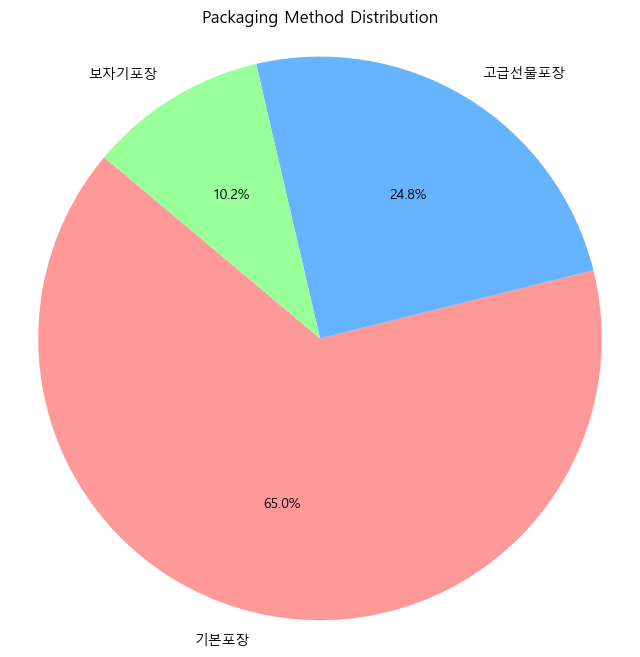

포장방식
기본포장      260
고급선물포장     99
보자기포장      41
Name: count, dtype: int64


<Figure size 640x480 with 0 Axes>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
df = pd.read_csv('한우세트_최종데이터.csv', encoding='utf-8-sig')

# 2. 포장방식별 개수 세기
packaging_counts = df['포장방식'].value_counts()

# 3. 시각화 설정 (파이 차트)
plt.figure(figsize=(8, 8))
plt.pie(
    packaging_counts, 
    labels=packaging_counts.index, 
    autopct='%1.1f%%',      # 퍼센트 표시 (소수점 첫째자리까지)
    startangle=140,         # 시작 각도 설정
    colors=['#ff9999','#66b3ff','#99ff99'] # 색상 지정
)

# 4. 제목 및 출력 설정
plt.title('Packaging Method Distribution')
plt.axis('equal')           # 차트를 정원 형태로 유지
plt.show()

# 수치 데이터 요약 출력
print(packaging_counts)

import matplotlib.pyplot as plt

# ... 그래프 그리는 코드들 ...

# 1. 이미지 저장 (파일명과 확장자 지정)
plt.savefig('포장 방식 선택.png')

# 2. 화면에 출력 (저장 후에 호출하는 것이 좋습니다)
plt.show()

### 인기 상품 순위 파악하기

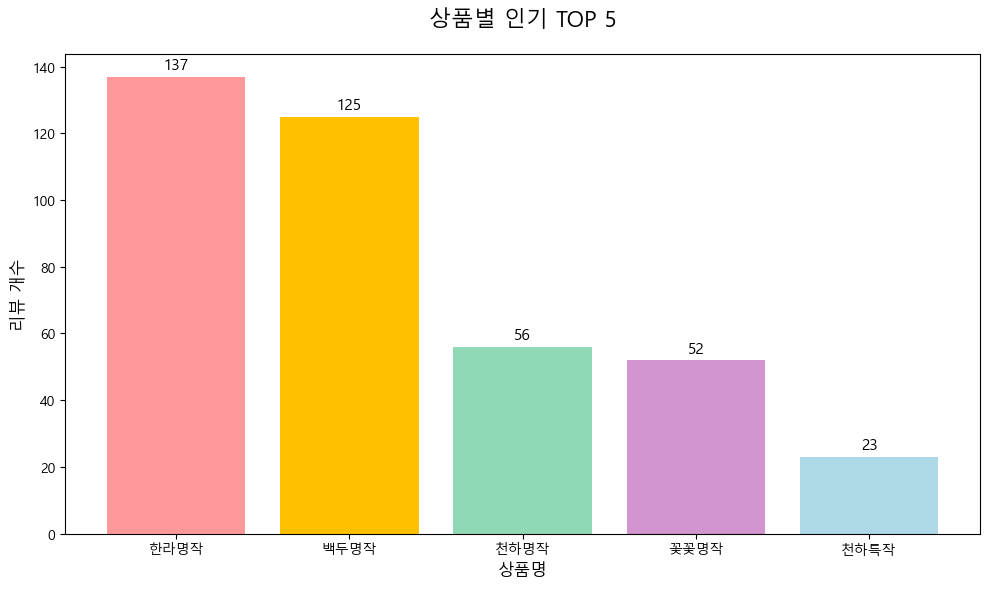

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 한글 폰트 및 마이너스 깨짐 설정 (윈도우 기준: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 2. 데이터 불러오기
df = pd.read_csv('한우세트_최종데이터.csv', encoding='utf-8-sig')

# 3. 상품명별 개수를 세고 상위 5개만 뽑기
top_products = df['상품명'].value_counts().head(5)

# 4. 막대 그래프 시각화 설정
plt.figure(figsize=(10, 6)) # 그래프 크기 설정 (가로 10, 세로 6)
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#add8e6'] # 막대 색상

# 5. 막대 그래프 그리기
bars = plt.bar(top_products.index, top_products.values, color=colors)

# 6. 그래프 제목 및 축 이름 추가
plt.title('상품별 인기 TOP 5', fontsize=16, pad=20)
plt.xlabel('상품명', fontsize=12)
plt.ylabel('리뷰 개수', fontsize=12)

# 7. 막대 위에 숫자(데이터 값) 표시하기
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 1, '%d' % int(height), ha='center', va='bottom', fontsize=11)

# 8. 그래프 출력
plt.tight_layout() # 여백 조정
# 1. 이미지 저장 (파일명과 확장자 지정)
plt.savefig('상품별 인기 Top 5.png')
plt.show()

### 주문량 많은 시기 확인

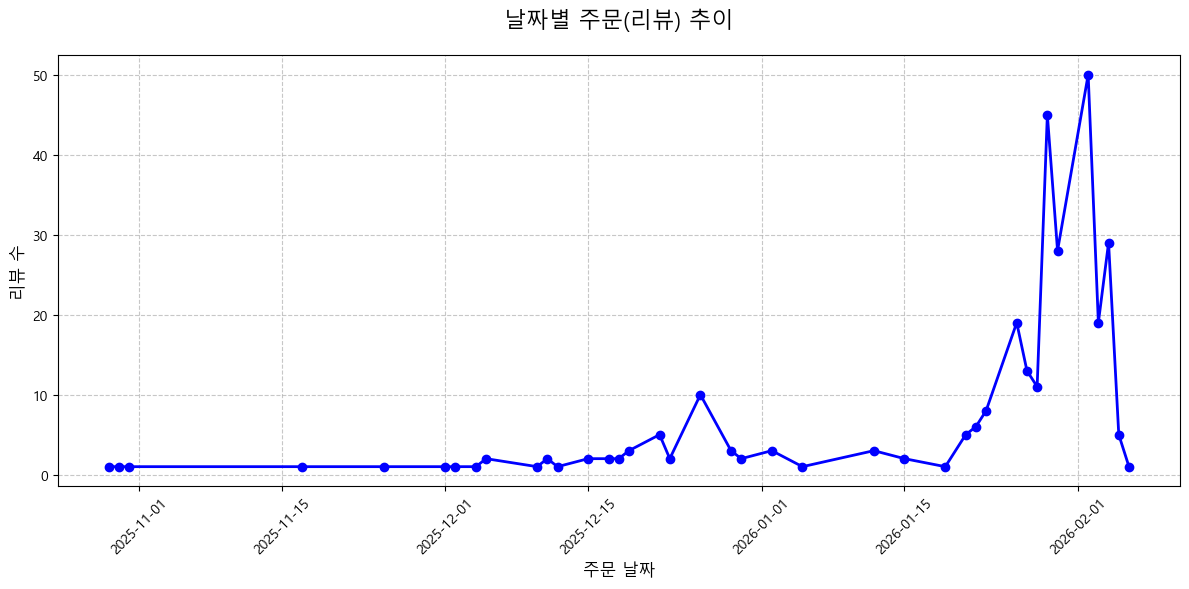

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 한글 폰트 및 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 2. 데이터 불러오기
df = pd.read_csv('한우세트_최종데이터.csv', encoding='utf-8-sig')

# 3. 날짜 데이터 전처리
# '주문날짜'가 비어있는 행은 제거하고, 문자열을 실제 '날짜' 형식으로 변환합니다.
df_date = df.dropna(subset=['주문날짜']).copy()
df_date['주문날짜'] = pd.to_datetime(df_date['주문날짜'])

# 4. 날짜별로 리뷰 개수(주문 건수) 집계
date_counts = df_date.groupby('주문날짜').size()

# 5. 선 그래프(Line Chart) 시각화
plt.figure(figsize=(12, 6))
plt.plot(date_counts.index, date_counts.values, marker='o', linestyle='-', color='b', linewidth=2)

# 6. 그래프 꾸미기
plt.title('날짜별 주문(리뷰) 추이', fontsize=16, pad=20)
plt.xlabel('주문 날짜', fontsize=12)
plt.ylabel('리뷰 수', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7) # 격자 추가
plt.xticks(rotation=45) # x축 날짜 글자 겹침 방지 (45도 회전)

# 7. 출력
plt.tight_layout()
# 1. 이미지 저장 (파일명과 확장자 지정)
plt.savefig('포장 방식 선택.png')
plt.show()

In [13]:
# '배송' 또는 '도착'이라는 단어가 포함된 리뷰만 추출
delivery_reviews = df[df['후기'].str.contains('배송|도착|하루|이틀', na=False)]

# 해당 리뷰들만 출력해서 확인
print(delivery_reviews['후기'].head(10))

2                                   배송도 빠르고 아주 만족합니다~^^
35                                잘 먹겠습니다 \n\n배송도 감사합니다
38                             선물드렸는데\n제날짜에 잘 배송 되었어요~~
47                                           빠른배송감사합니다.
55                                       배송도 빠르고 맛도 좋아요
56                        아주 신선한 고기가 잘 도착했어요. 낼 먹어보려구요.
69                               고기 퀄리티와 배송 포장 모두 최고입니다
70           배송날짜에 착오없이 배송 잘되었어요\n받으시는분이 좋아하시네요\n감사합니다.
73        포장 정말 잘되어 있고, 고기도 좋고,연하고 맛있어요!!배송도 엄청 빨랐어요!!!
82    지난 명절 선물세트 만족해서\n그 뒤로는 엄마네 재구매합니다\n배송 변경 요청도 잘...
Name: 후기, dtype: object
